In [83]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os as os
import datetime
import seaborn as sns

sns.set_style('darkgrid')
sensor_labels = ['3.3V 10A', '12V 10A', 'Ext 12V 20A', 'USB-C 20V 5A']
line_color = ['b', 'r', 'k', 'k']

## Noise measurement

In [3]:
def read_datafile(file_name):
    with open(file_name, newline='') as csvfile:
        data = []
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            data.append(row)
    data = np.array(data[1:])
    volt = [float(dat) for dat in data.transpose()[4+1+sensor*3].flatten()]
    current = [float(dat) for dat in data.transpose()[4+sensor*3].flatten()]
    power = [volt[cnt]*current[cnt] for cnt in range(len(volt))]
    time = [float(dat) for dat in data.transpose()[1].flatten()]
    dtime = [float(dat) for dat in data.transpose()[2].flatten()]
    return volt, current, power, time, dtime

In [103]:
sensor = 2 # 12V 7.5 A
#file_name = 'M:/VIEWlogic/Projects/PowerSensor/Measurements/noise/Set3_PCIe8pin_1A.csv'
file_name = 'M:/VIEWlogic/Projects/PowerSensor/Measurements/noise/Set3_PCIe8pin_05A.csv'

file_time = os.path.getmtime(file_name)
time_scale.append(os.path.getmtime(file_name))
volt, current, power, time, dtime = read_datafile(file_name)


In [104]:
def count_values(items):
    item_list=[]
    counts={}
    for one_item in items:
        item = str(one_item)
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
            item_list.append(item)
    item_list = np.sort(item_list)
    hist=[]
    for item in item_list:
        hist.append(counts[item])
    return hist, item_list 

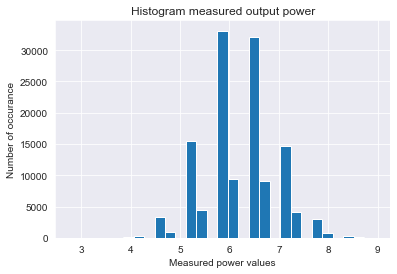

In [105]:
steps = 30
bins = [np.min(power) + cnt*(np.max(power) - np.min(power))/steps for cnt in range(steps) ]
plt.figure(6)
plt.hist(power, bins)
plt.xlabel("Measured power values")
plt.ylabel("Number of occurance")
plt.grid(True)
plt.title(f"Histogram measured output power")
plt.show()

In [106]:
def avg_data_calc(avg_samples = 32, power=power):
    tot_samples = int(len(power)/avg_samples)*avg_samples
    avg_data = np.mean(np.array(power[:tot_samples]).reshape(-1,avg_samples),axis=1)
    return avg_data, tot_samples

fs, min, max, p-p, std
 20.0,   2.78,   9.16,  6.381,  0.718
 10.0,   4.04,   8.22,  4.173,  0.507
  5.0,   4.85,   7.69,  2.842,  0.358
  1.0,   5.66,   6.85,  1.183,  0.160
  0.5,   5.85,   6.67,  0.821,  0.113


C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_45264\3505846466.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


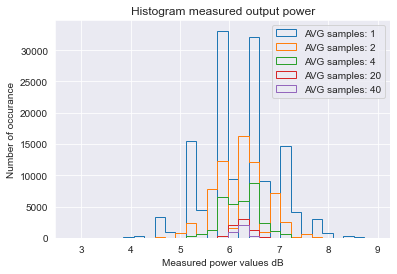

In [107]:
fig, ax = plt.subplots()
fs = 20e3
data = power
bins = [np.min(data) + cnt*(np.max(data) - np.min(data))/steps for cnt in range(steps) ]
sample_rates = [20, 10, 5, 1, 0.5]
print("fs, min, max, p-p, std")
for sample_rate in sample_rates:
    avg_samples = int(20/sample_rate)
    avg_data, tot_samples = avg_data_calc(avg_samples, data)
    ax.hist(avg_data, bins, histtype='step', label=f"AVG samples: {avg_samples}")
    if 0:
        stri = f"Avg Samples = {avg_samples:3}, min: {np.min(avg_data):5.3f}, max: {np.max(avg_data):5.3f}, " 
        stri += f"peak-peak: {np.max(avg_data)-np.min(avg_data):5.3f}, std: {np.std(avg_data):5.3f}"
    else:
        stri = f"{fs/(1000*avg_samples):5.1f}, {np.min(avg_data):6.2f}, {np.max(avg_data):6.2f}, "
        stri += f"{np.max(avg_data)-np.min(avg_data):6.3f}, {np.std(avg_data):6.3f}"
    print(stri)
   
ax.set(xlabel="Measured power values dB" , ylabel="Number of occurance",
       title="Histogram measured output power")

ax.legend(loc="upper right")
ax.grid(True)
fig.show()